In [110]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_boston
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [82]:
X = data[[ 'CRIM', 'ZN', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [122]:
dtree = DecisionTreeRegressor(criterion ='mse', max_depth = 3) 

In [126]:
#построим модель и график самого дерева
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
mean_absolute_error(predictions, y_test)

3.681468544330342

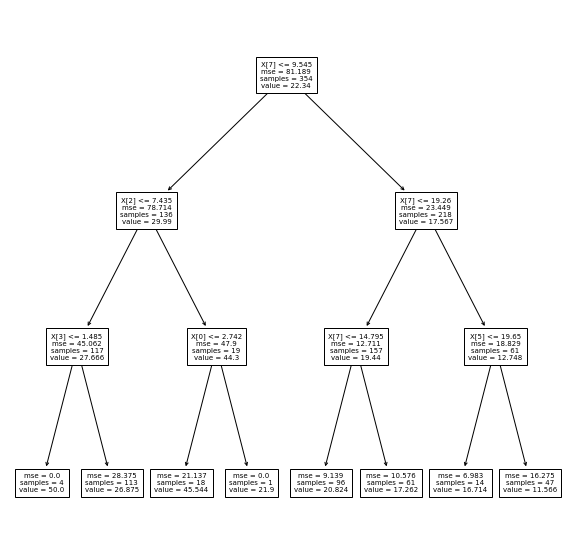

In [125]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
_ = tree.plot_tree(dtree, fontsize=7)

plt.show()

In [149]:
#попробуем поменять глубину дерева
for i in range (3, 10):
    dtree = DecisionTreeRegressor(criterion ='mse', max_depth = i) 
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_test)
    
    print(f" max_depth = {i}, MAE = {round(mean_absolute_error(predictions, y_test), 4)}")

 max_depth = 3, MAE = 3.5259
 max_depth = 4, MAE = 3.0905
 max_depth = 5, MAE = 2.7893
 max_depth = 6, MAE = 3.3002
 max_depth = 7, MAE = 2.8081
 max_depth = 8, MAE = 2.835
 max_depth = 9, MAE = 2.9065


In [150]:
#сравним передыдущие значения со значениями для модели, использующий критерий
for i in range (3, 10):
    dtree = DecisionTreeRegressor(criterion ='mae', max_depth = i) 
    dtree.fit(X_train, y_train)
    predictions = dtree.predict(X_test)
    
    print(f" max_depth = {i}, MAE = {round(mean_absolute_error(predictions, y_test), 4)}")

 max_depth = 3, MAE = 3.4668
 max_depth = 4, MAE = 2.8053
 max_depth = 5, MAE = 2.8372
 max_depth = 6, MAE = 3.0069
 max_depth = 7, MAE = 2.8681
 max_depth = 8, MAE = 3.2418
 max_depth = 9, MAE = 3.1885
